Processing file: V.csv
Processing file: IHF.csv
Processing file: HCA.csv
Processing file: HUM.csv
Processing file: TXN.csv
Processing file: MSFT.csv
Processing file: NVDA.csv
Processing file: IYW.csv
Processing file: CVS.csv
Processing file: CNC.csv
Processing file: SPY.csv
Processing file: GOOGL.csv
Processing file: GOOG.csv
Processing file: AVGO.csv
Processing file: MA.csv
Processing file: AAPL.csv
Processing file: CI.csv
Processing file: VGT.csv
Processing file: CRM.csv
Correlation coefficient between stock1 and stock2:  0.1040522530231387
Correlation coefficient between stock1 and stock2:  0.31944631412799646
Correlation coefficient between stock1 and stock2:  -0.397310351977895
Correlation coefficient between stock1 and stock2:  0.6369895084507843
Correlation coefficient between stock1 and stock2:  0.2554067418610817
Correlation coefficient between stock1 and stock2:  0.2259977811491939
Correlation coefficient between stock1 and stock2:  0.5283494333960707
Correlation coefficient 

/var/folders/44/7pn8ysx17xxffn3_g_dl5pgr0000gn/T/ipykernel_17820/1597306875.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot = df.pivot('stock1', 'stock2', 'correlation')


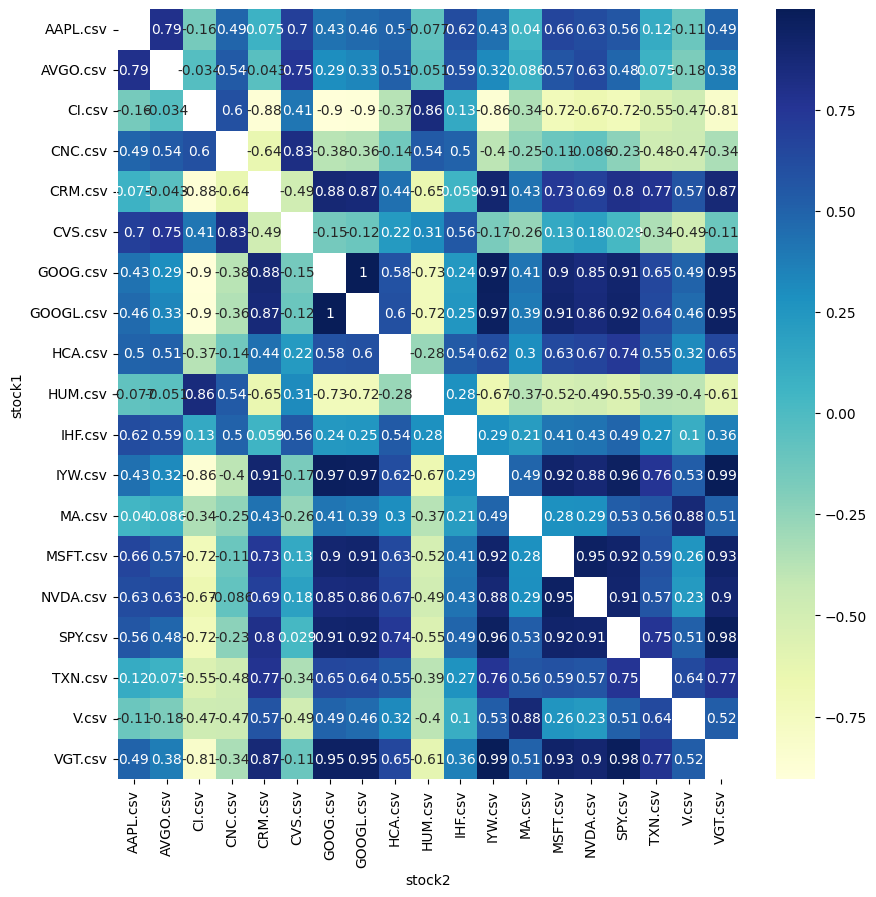

In [4]:
import os
import pandas as pd

#dataframes = read_csv_files('data')
def read_csv_files(folder_path):
    # Directory containing the CSV files
    folder_path = 'data'

    # List all files in the folder
    files = os.listdir(folder_path)

    dataframes = {}
    # Iterate through the files
    for file in files:
        # Check if the file has a .csv extension
        if file.endswith('.csv'):
            # Construct the full file path by joining the folder path and file name
            file_path = os.path.join(folder_path, file)
            
            # Load the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            dataframes[file] = df
            
            # Perform data analysis or other tasks on the DataFrame
            # For example, you can calculate correlations, plot data, etc.
            # ...
            
            # Print file name or perform other actions
            print('Processing file:', file)

    return dataframes


def calculate_correlation(df1, df2):
    # Calculate correlation
    correlation = df1['close'].corr(df2['close'])

    # Print correlation coefficient
    print('Correlation coefficient between stock1 and stock2: ', correlation)

    return correlation

dataframes = read_csv_files('./data')

keys = list(dataframes.keys())
correlation_results = []
for i in range(len(keys)) :
    for j in range(len(keys)) :
        if i == j :
            continue
        correlation = calculate_correlation(dataframes[keys[i]], dataframes[keys[j]])
        correlation_results.append([keys[i], keys[j], correlation])

print(correlation_results)
# plots 2d correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table from the correlatoin_resutls
df = pd.DataFrame(correlation_results, columns=['stock1', 'stock2', 'correlation'])
df_pivot = df.pivot('stock1', 'stock2', 'correlation')

# Create a heatmap from the pivot table
plt.figure(figsize=(10, 10))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu')
plt.show()